# Spam Detection Baseline

## Project Overview
This notebook contains baseline models for spam detection using SMS data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Text processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# 1. Load data
df = pd.read_csv('/content/drive/My Drive/Portfolio/spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'class', 'v2': 'sms'})
df = df[['class', 'sms']]

In [ ]:
# 2. Basic EDA
## 2.1 Check basic information
print("Dataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['class'].value_counts(normalize=True))

# Display basic dataset information
print("1. Dataset Information:")
print(df.info())

# Display sample data
print("\n3. First few messages:")
print(df.head())

# Check for missing values
print("\n4. Missing Values:")
print(df.isnull().sum())

Dataset Shape: (5572, 2)

Class Distribution:
class
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


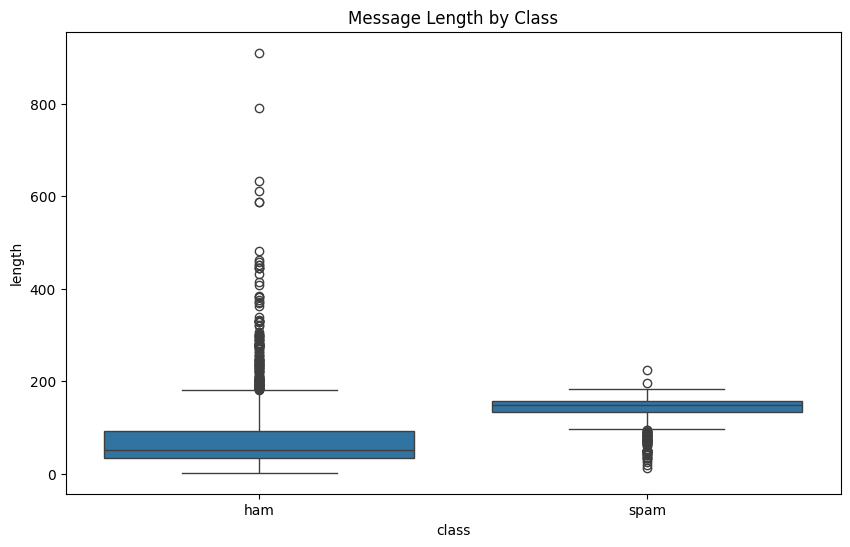

In [ ]:
## 2.2 Analyze text length
df['length'] = df['sms'].str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='length', data=df)
plt.title('Message Length by Class')
plt.show()

In [ ]:
## 2.3 Check most common words
def get_top_words(text_series, n=20):
   words = ' '.join(text_series).lower().split()
   return pd.Series(Counter(words).most_common(n))

# Most common words for each class
print("\nMost common words in Spam messages:")
print(get_top_words(df[df['class']=='spam']['sms']))
print("\nMost common words in Ham messages:")
print(get_top_words(df[df['class']=='ham']['sms']))


Most common words in Spam messages:
0         (to, 682)
1          (a, 373)
2       (call, 342)
3       (your, 263)
4        (you, 252)
5        (the, 204)
6        (for, 201)
7         (or, 188)
8       (free, 180)
9          (2, 169)
10        (is, 152)
11        (ur, 144)
12        (on, 141)
13       (txt, 136)
14      (have, 135)
15      (from, 127)
16       (and, 122)
17         (u, 117)
18      (text, 112)
19    (mobile, 109)
dtype: object

Most common words in Ham messages:
0       (i, 2172)
1     (you, 1665)
2      (to, 1544)
3     (the, 1113)
4       (a, 1046)
5        (u, 874)
6      (and, 845)
7       (in, 786)
8       (my, 741)
9       (is, 710)
10      (me, 584)
11      (of, 518)
12     (for, 496)
13    (that, 442)
14      (it, 440)
15    (have, 433)
16    (your, 413)
17     (but, 413)
18     (are, 405)
19      (so, 399)
dtype: object


In [ ]:
# 3. Simple preprocessing function
def preprocess_text(text):
   text = text.lower()
   text = re.sub(r'[^a-zA-Z\s]', '', text)
   text = re.sub(r'\s+', ' ', text).strip()
   return text

df['processed_text'] = df['sms'].apply(preprocess_text)

In [ ]:
# 4. Modeling
# Split data
X_train, X_test, y_train, y_test = train_test_split(
   df['processed_text'],
   df['class'],
   test_size=0.2,
   random_state=42
)

In [ ]:
# 4.1 Baseline 1: CountVectorizer + Logistic Regression
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_vec, y_train)

# Evaluate performance
lr_pred = lr_model.predict(X_test_vec)
print("\nLogistic Regression Results:")
print(classification_report(y_test, lr_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# alternative way to check the model performance
print("\nKey Metrics Summary:")
print(f"Overall Accuracy: {accuracy_score(y_test, lr_pred):.3f}")
print("\nPer-Class Metrics:")
print(f"Ham - F1 Score: {f1_score(y_test, lr_pred, pos_label='ham'):.3f}")
print(f"Spam - F1 Score: {f1_score(y_test, lr_pred, pos_label='spam'):.3f}")


Key Metrics Summary:
Overall Accuracy: 0.978

Per-Class Metrics:
Ham - F1 Score: 0.988
Spam - F1 Score: 0.914


In [ ]:
# 4.2 Baseline 2: TF-IDF + Random Forest
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Evaluate performance
rf_pred = rf_model.predict(X_test_tfidf)
print("\nRandom Forest Results:")
print(classification_report(y_test, rf_pred))


Random Forest Results:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

